Alden Bradford, February 4

Hi everyone, I want to show you how you can make animations of paths using the tools we have. I put a short script here which handles most of it -- it's short, you can read it -- but I'll show you how to use it here. We need kind of a lot of imports:

In [1]:
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from IPython.display import Image
from progressbar import ProgressBar
import git
import os
import sys
root = git.Repo(os.getcwd(), search_parent_directories=True).git.rev_parse("--show-toplevel")
sys.path.append(os.path.join(root, 'data_processing'))
import make_features
from animate_paths import animate_paths

%matplotlib widget

First off, let's grab some data.

In [2]:
incidents, acceleration = make_features.load_data()

Let's just pick the first ten incidents to plot.

In [3]:
i = incidents.iloc[:10]
display(i)
a = acceleration.loc[i.index]
display(a)

,hash_id,motion,occurrence_ts,confirmation_ts
incident_id,,,,
729353,0c96025713b01a04beff5193cbf7d76d,other,NaT,NaT
729389,0c96025713b01a04beff5193cbf7d76d,other,NaT,NaT
729405,0c96025713b01a04beff5193cbf7d76d,other,NaT,NaT
730067,0c96025713b01a04beff5193cbf7d76d,other,NaT,NaT
730071,0c96025713b01a04beff5193cbf7d76d,other,NaT,NaT
730074,0c96025713b01a04beff5193cbf7d76d,other,NaT,NaT
730083,0c96025713b01a04beff5193cbf7d76d,other,NaT,NaT
730084,0c96025713b01a04beff5193cbf7d76d,other,NaT,NaT
730085,0c96025713b01a04beff5193cbf7d76d,other,NaT,NaT


x     y     z
incident_id milliseconds                  
729353      -7480        -0.59 -1.02 -0.15
            -7440        -0.57 -1.10 -0.16
            -7400        -0.50 -1.21 -0.27
            -7360        -0.51 -1.29 -0.34
            -7320        -0.71 -1.26 -0.43
...                        ...   ...   ...
730196       7320        -0.17  1.01  0.25
             7360        -0.30  0.91  0.22
             7400        -0.33  0.89  0.23
             7440        -0.30  0.90  0.22
             7480        -0.27  0.90  0.20

[3750 rows x 3 columns]

Here's how to make an animation showing these. This isn't a fancy game engine or anything, so you will get a better result by rendering it in advance. It takes about 30 seconds.

100% (375 of 375) |######################| Elapsed Time: 0:00:21 Time:  0:00:21


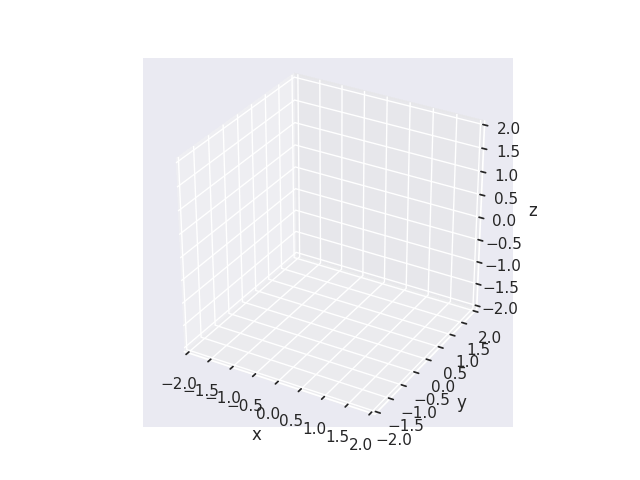

In [4]:
ani = animate_paths(a, clip_tail = 15)
with ProgressBar(max_value = 375) as bar:
    ani.save("example.gif", progress_callback = bar.update)
Image('example.gif')

That's generally the most convenient way to do it. Here's something that might actually be useful. Let's look at all the paths from one employer, and trace out the smoothed directions.

100% (375 of 375) |######################| Elapsed Time: 0:00:24 Time:  0:00:24


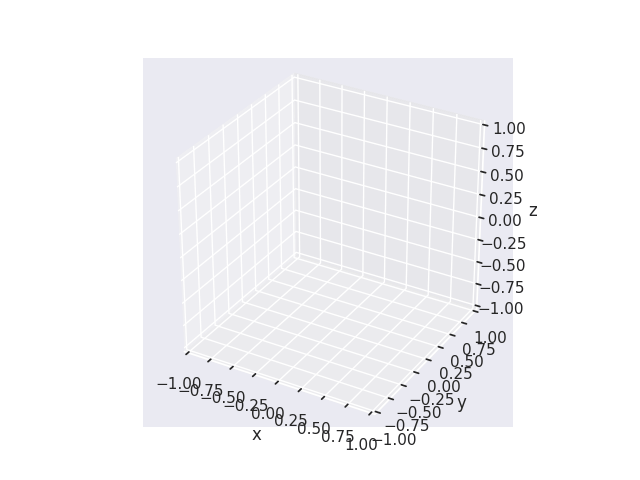

In [5]:
i = incidents[incidents['hash_id'] == '9f3c26bac06f18a200f3db647af294cf']
directions = make_features.transformations.direction(acceleration.loc[i.index])
ani = animate_paths(directions, clip_tail = 40, scale = 1)
with ProgressBar(max_value = 375) as bar:
    ani.save("example2.gif", progress_callback = bar.update)
Image('example2.gif')

There is something actually interesting: some of these devices seem to be mounted in an opposite direction.

Finally, let's see another way to interact with these animations -- something more interactive. We have to keep the animation saved as a variable; if you overwrite it, the animation goes away. JupyterLab can't handle too many of these happening at once, but they could be really useful.

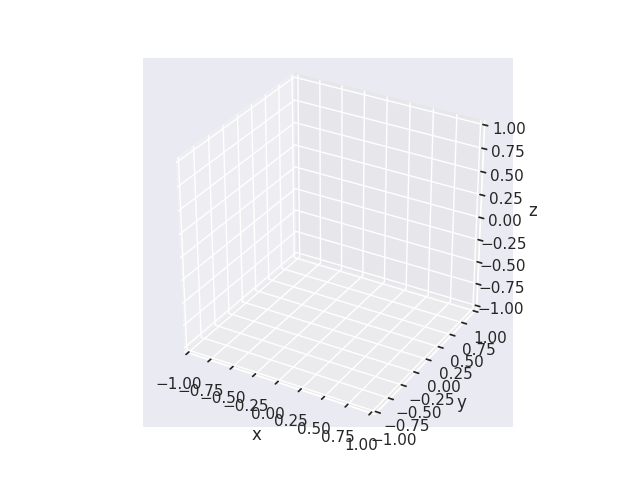

In [6]:
i = incidents[incidents['hash_id'] == 'a2845cf621b2c5d99603722839247eb6']
directions = make_features.transformations.direction(acceleration.loc[i.index])
ani = animate_paths(directions, clip_tail = 100, scale = 1, clear_plot = False)
plt.show()